In [2]:
import pandas as pd

# Load train dataset
train_df = pd.read_csv("data/train_set.csv")
print(train_df.head())

y_train = train_df['sentiment']
X_train = train_df['text']

# Load test dataset
test_df = pd.read_csv("data/test_set.csv")
print(test_df.head())

y_test = test_df['sentiment']
X_test = test_df['text']

                                                text  sentiment
0  clint eastwood play wound union soldier find g...          1
1  rent movie sound pretty interesting horror mov...          0
2  great example could great film great idea turn...          0
3  ok admit watch movie mystery science theater 3...          0
4  movie absolutely terrible not act awful sleep ...          0
                                                text  sentiment
0  attack killer tomato parody bad monster movie ...          0
1  pam grier star coffy nurse seek revenge drug d...          0
2  movie never imagine richard attenborough could...          1
3  patricia hunter oh professor also make habit c...          0
4  go generous give 3 live huntsville great see w...          0


# Feature Extraction (for ML models)

### Term Frequency - Inverse Document Frequency (TF-IDF)

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=20000, ngram_range=(1,3))
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# ML Models

In [5]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, cross_validate, validation_curve
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [5]:
def plot_valid_curves(train_scores, valid_scores, param_range, x_label, logx=False):
    # Calculate means and std devs
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    valid_mean = np.mean(valid_scores, axis=1)
    valid_std = np.std(valid_scores, axis=1)
    
    if logx:
        param_range=np.log(param_range)
    
    # Plot validation curves
    plt.plot(param_range, train_mean, color = 'blue', marker='o', 
             markersize=5, label='Training accuracy')
    plt.fill_between(param_range, train_mean + train_std, 
                     train_mean - train_std, alpha=0.15, color='blue')
    plt.plot(param_range, valid_mean, color = 'green', linestyle='--', 
             marker='s', markersize=5, label='Validation accuracy')
    plt.fill_between(param_range, valid_mean + valid_std, 
                     valid_mean - valid_std, alpha=0.15, color='green')
    plt.grid()
    plt.legend(loc='lower right')
    plt.xlabel(x_label)
    plt.ylabel('Accuracy')
    plt.show()

In [6]:
def eval_clf(clf, X_train, X_test, y_train, y_test):
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)

    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)

    print('Training Accuracy Score: {0:.3f}'.format(train_acc))
    print('Test Accuracy Score: {0:.3f}'.format(test_acc))

    cm = confusion_matrix(y_test, y_test_pred)
    sns.heatmap(cm, annot=True, fmt='d')
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix (Test)")
    plt.show()

### Logistic Regression

CV Accuracy: 0.894
Training Accuracy Score: 0.932
Test Accuracy Score: 0.899


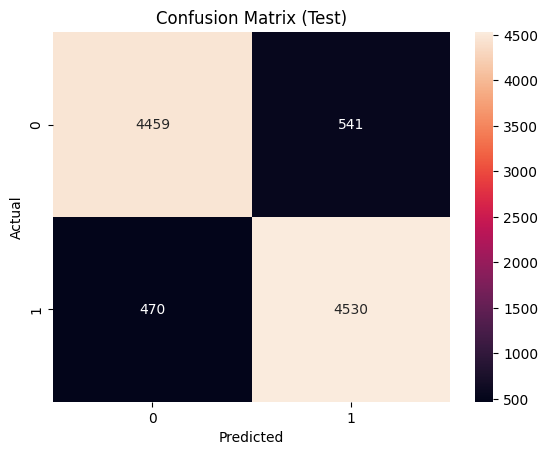

In [7]:
lr = LogisticRegression(max_iter=1000) # performs L2 regularisation as well
lr_scores = cross_validate(lr, X_train_vec, y_train, scoring='accuracy', cv=5)
lr_scores_mean = np.mean(lr_scores['test_score'])

print('CV Accuracy: {0:.3f}'.format(lr_scores_mean))

lr.fit(X_train_vec, y_train)
eval_clf(lr, X_train_vec, X_test_vec, y_train, y_test)


### Support Vector Machines

In [8]:
# Create samples
sample_frac = 0.1
X_train_sample, _, y_train_sample, _ = train_test_split(X_train_vec, y_train, train_size=sample_frac, random_state=42)

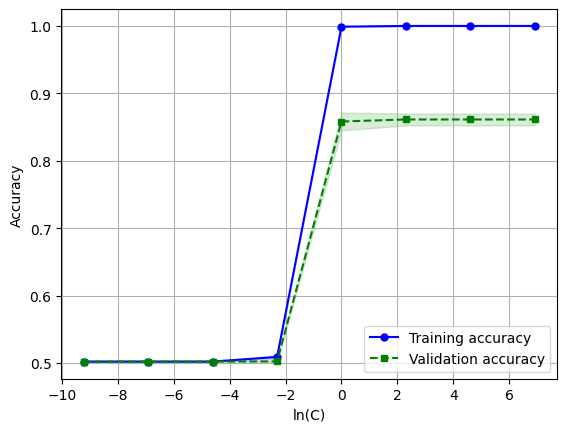

In [47]:
# Tune SVM - C
svc = SVC()

svm_param_range = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
svmc_train_scores1, svmc_valid_scores1 = validation_curve(estimator=svc, 
                                              X=X_train_sample, y=y_train_sample, 
                                              param_name='C',
                                              param_range=svm_param_range, cv=5)

# Plot validation curves - SVM (C)
plot_valid_curves(svmc_train_scores1, svmc_valid_scores1, svm_param_range, 'ln(C)', True)

In [ ]:
# Get mean train and CV R2 at C = 10
print(np.mean(svmc_train_scores1, axis=1)[5])
print(np.mean(svmc_valid_scores1, axis=1)[5])

1.0
0.8612500000000001


Based on the validation curves, the optimal value for C in the SVM is 1, where validation R2 is maximised.

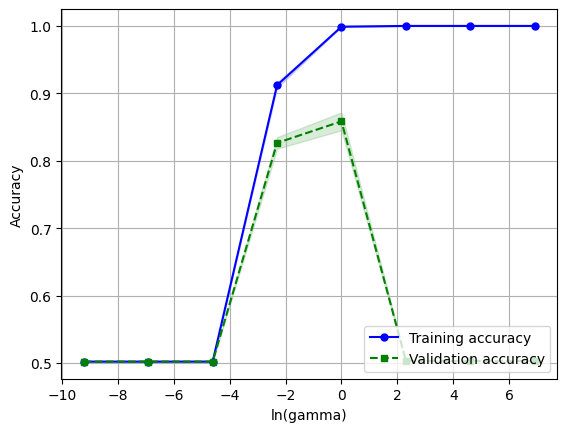

In [ ]:
# Tune SVM - gamma
svmg_train_scores2, svmg_valid_scores2 = validation_curve(estimator=svc, 
                                              X=X_train_sample, y=y_train_sample, 
                                              param_name='gamma', 
                                              param_range=svm_param_range, cv=5)

# Plot validation curves - SVM (gamma)
plot_valid_curves(svmg_train_scores2, svmg_valid_scores2, svm_param_range, 'ln(gamma)', True)

In [ ]:
# Get mean train and CV R2 at gamma = 1
print(np.mean(svmg_train_scores2, axis=1)[4])
print(np.mean(svmg_valid_scores2, axis=1)[4])

0.998875
0.8584999999999999


In [ ]:
# Tune SVM - degree
svm_param_degree = [2, 3, 4, 5]
svmg_train_scores3, svmg_valid_scores3 = validation_curve(estimator=svc, 
                                              X=X_train_sample, y=y_train_sample, 
                                              param_name='degree', 
                                              param_range=svm_param_degree, cv=5)

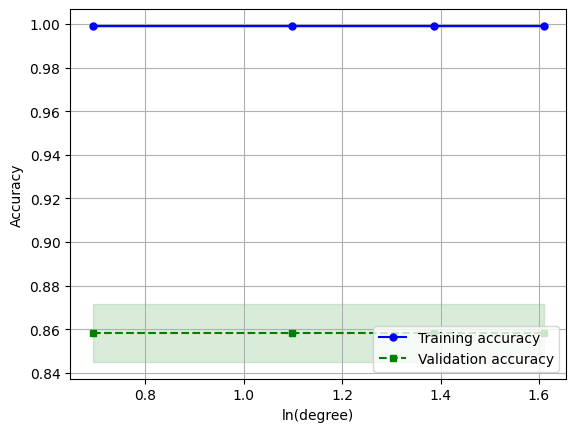

In [ ]:
# Plot validation curves - SVM (degree)
plot_valid_curves(svmg_train_scores3, svmg_valid_scores3, svm_param_degree, 'ln(degree)', True)

In [ ]:
# Get mean train and CV R2 at degree = 2
print(np.mean(svmg_train_scores3, axis=1)[0])
print(np.mean(svmg_valid_scores3, axis=1)[0])

0.998875
0.85825


In [ ]:
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf'],
    'gamma': [0.1, 1, 10],
    'degree': [2, 3, 4]  # for 'poly' kernel
}

gs1 = GridSearchCV(estimator = svc, param_grid = param_grid, scoring = 'accuracy', cv=5)

gs1.fit(X_train_sample, y_train_sample)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'degree': [2, 3, 4],
                         'gamma': [0.1, 1, 10],
                         'kernel': ['linear', 'poly', 'rbf']},
             scoring='accuracy')

In [ ]:
print(gs1.best_score_)
# 0.8615

0.8615


In [ ]:
print(gs1.best_params_)
# {'C': 10, 'degree': 2, 'gamma': 1, 'kernel': 'rbf'}

{'C': 10, 'degree': 2, 'gamma': 1, 'kernel': 'rbf'}


In [ ]:
# Fit rbf SVM to data
rsvm = SVC(kernel='rbf', C=10, gamma=1)
rsvm.fit(X_train_vec, y_train)

SVC(C=10, gamma=1)

Training Accuracy Score: 1.000
Test Accuracy Score: 0.908


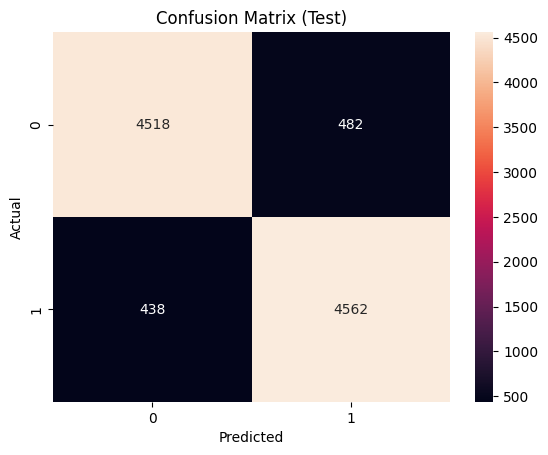

In [ ]:
# Evaluate model
eval_clf(rsvm, X_train_vec, X_test_vec, y_train, y_test)

### Naïve Bayes with Bag of Words

##### Hyperperimeter experimentation

Testing max_features=5000, alpha=0...


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/naive_bayes.py:898: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/naive_bayes.py:898: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(


Testing max_features=5000, alpha=0.1...
Testing max_features=5000, alpha=0.2...
Testing max_features=5000, alpha=0.3...
Testing max_features=5000, alpha=0.4...
Testing max_features=5000, alpha=0.5...
Testing max_features=5000, alpha=0.6...
Testing max_features=5000, alpha=0.7...
Testing max_features=5000, alpha=0.8...
Testing max_features=5000, alpha=0.9...
Testing max_features=5000, alpha=1...
Testing max_features=10000, alpha=0...


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/naive_bayes.py:898: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/naive_bayes.py:898: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/naive_bayes.py:898: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/naive_bayes.py:898: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/naive_bayes.py:898: RuntimeWarning: divide by zero e

Testing max_features=10000, alpha=0.1...
Testing max_features=10000, alpha=0.2...
Testing max_features=10000, alpha=0.3...
Testing max_features=10000, alpha=0.4...
Testing max_features=10000, alpha=0.5...
Testing max_features=10000, alpha=0.6...
Testing max_features=10000, alpha=0.7...
Testing max_features=10000, alpha=0.8...
Testing max_features=10000, alpha=0.9...
Testing max_features=10000, alpha=1...
Testing max_features=15000, alpha=0...


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/naive_bayes.py:898: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/naive_bayes.py:898: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/naive_bayes.py:898: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/naive_bayes.py:898: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/naive_bayes.py:898: RuntimeWarning: divide by zero e

Testing max_features=15000, alpha=0.1...
Testing max_features=15000, alpha=0.2...
Testing max_features=15000, alpha=0.3...
Testing max_features=15000, alpha=0.4...
Testing max_features=15000, alpha=0.5...
Testing max_features=15000, alpha=0.6...
Testing max_features=15000, alpha=0.7...
Testing max_features=15000, alpha=0.8...
Testing max_features=15000, alpha=0.9...
Testing max_features=15000, alpha=1...
Testing max_features=20000, alpha=0...


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/naive_bayes.py:898: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/naive_bayes.py:898: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/naive_bayes.py:898: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/naive_bayes.py:898: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/naive_bayes.py:898: RuntimeWarning: divide by zero e

Testing max_features=20000, alpha=0.1...
Testing max_features=20000, alpha=0.2...
Testing max_features=20000, alpha=0.3...
Testing max_features=20000, alpha=0.4...
Testing max_features=20000, alpha=0.5...
Testing max_features=20000, alpha=0.6...
Testing max_features=20000, alpha=0.7...
Testing max_features=20000, alpha=0.8...
Testing max_features=20000, alpha=0.9...
Testing max_features=20000, alpha=1...
Testing max_features=25000, alpha=0...


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/naive_bayes.py:898: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/naive_bayes.py:898: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/naive_bayes.py:898: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/naive_bayes.py:898: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/naive_bayes.py:898: RuntimeWarning: divide by zero e

Testing max_features=25000, alpha=0.1...
Testing max_features=25000, alpha=0.2...
Testing max_features=25000, alpha=0.3...
Testing max_features=25000, alpha=0.4...
Testing max_features=25000, alpha=0.5...
Testing max_features=25000, alpha=0.6...
Testing max_features=25000, alpha=0.7...
Testing max_features=25000, alpha=0.8...
Testing max_features=25000, alpha=0.9...
Testing max_features=25000, alpha=1...
Testing max_features=30000, alpha=0...


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/naive_bayes.py:898: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/naive_bayes.py:898: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/naive_bayes.py:898: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/naive_bayes.py:898: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/naive_bayes.py:898: RuntimeWarning: divide by zero e

Testing max_features=30000, alpha=0.1...
Testing max_features=30000, alpha=0.2...
Testing max_features=30000, alpha=0.3...
Testing max_features=30000, alpha=0.4...
Testing max_features=30000, alpha=0.5...
Testing max_features=30000, alpha=0.6...
Testing max_features=30000, alpha=0.7...
Testing max_features=30000, alpha=0.8...
Testing max_features=30000, alpha=0.9...
Testing max_features=30000, alpha=1...
Testing max_features=35000, alpha=0...


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/naive_bayes.py:898: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/naive_bayes.py:898: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/naive_bayes.py:898: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/naive_bayes.py:898: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/naive_bayes.py:898: RuntimeWarning: divide by zero e

Testing max_features=35000, alpha=0.1...
Testing max_features=35000, alpha=0.2...
Testing max_features=35000, alpha=0.3...
Testing max_features=35000, alpha=0.4...
Testing max_features=35000, alpha=0.5...
Testing max_features=35000, alpha=0.6...
Testing max_features=35000, alpha=0.7...
Testing max_features=35000, alpha=0.8...
Testing max_features=35000, alpha=0.9...
Testing max_features=35000, alpha=1...
Testing max_features=40000, alpha=0...


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/naive_bayes.py:898: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/naive_bayes.py:898: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/naive_bayes.py:898: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/naive_bayes.py:898: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/naive_bayes.py:898: RuntimeWarning: divide by zero e

Testing max_features=40000, alpha=0.1...
Testing max_features=40000, alpha=0.2...
Testing max_features=40000, alpha=0.3...
Testing max_features=40000, alpha=0.4...
Testing max_features=40000, alpha=0.5...
Testing max_features=40000, alpha=0.6...
Testing max_features=40000, alpha=0.7...
Testing max_features=40000, alpha=0.8...
Testing max_features=40000, alpha=0.9...
Testing max_features=40000, alpha=1...
Testing max_features=45000, alpha=0...


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/naive_bayes.py:898: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/naive_bayes.py:898: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/naive_bayes.py:898: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/naive_bayes.py:898: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/naive_bayes.py:898: RuntimeWarning: divide by zero e

Testing max_features=45000, alpha=0.1...
Testing max_features=45000, alpha=0.2...
Testing max_features=45000, alpha=0.3...
Testing max_features=45000, alpha=0.4...
Testing max_features=45000, alpha=0.5...
Testing max_features=45000, alpha=0.6...
Testing max_features=45000, alpha=0.7...
Testing max_features=45000, alpha=0.8...
Testing max_features=45000, alpha=0.9...
Testing max_features=45000, alpha=1...
Testing max_features=50000, alpha=0...


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/naive_bayes.py:898: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/naive_bayes.py:898: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/naive_bayes.py:898: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/naive_bayes.py:898: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/naive_bayes.py:898: RuntimeWarning: divide by zero e

Testing max_features=50000, alpha=0.1...
Testing max_features=50000, alpha=0.2...
Testing max_features=50000, alpha=0.3...
Testing max_features=50000, alpha=0.4...
Testing max_features=50000, alpha=0.5...
Testing max_features=50000, alpha=0.6...
Testing max_features=50000, alpha=0.7...
Testing max_features=50000, alpha=0.8...
Testing max_features=50000, alpha=0.9...
Testing max_features=50000, alpha=1...
Testing max_features=55000, alpha=0...


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/naive_bayes.py:898: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/naive_bayes.py:898: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/naive_bayes.py:898: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/naive_bayes.py:898: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/naive_bayes.py:898: RuntimeWarning: divide by zero e

Testing max_features=55000, alpha=0.1...
Testing max_features=55000, alpha=0.2...
Testing max_features=55000, alpha=0.3...
Testing max_features=55000, alpha=0.4...
Testing max_features=55000, alpha=0.5...
Testing max_features=55000, alpha=0.6...
Testing max_features=55000, alpha=0.7...
Testing max_features=55000, alpha=0.8...
Testing max_features=55000, alpha=0.9...
Testing max_features=55000, alpha=1...
Testing max_features=60000, alpha=0...


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/naive_bayes.py:898: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/naive_bayes.py:898: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/naive_bayes.py:898: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/naive_bayes.py:898: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/naive_bayes.py:898: RuntimeWarning: divide by zero e

Testing max_features=60000, alpha=0.1...
Testing max_features=60000, alpha=0.2...
Testing max_features=60000, alpha=0.3...
Testing max_features=60000, alpha=0.4...
Testing max_features=60000, alpha=0.5...
Testing max_features=60000, alpha=0.6...
Testing max_features=60000, alpha=0.7...
Testing max_features=60000, alpha=0.8...
Testing max_features=60000, alpha=0.9...
Testing max_features=60000, alpha=1...
Testing max_features=65000, alpha=0...


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/naive_bayes.py:898: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/naive_bayes.py:898: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/naive_bayes.py:898: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/naive_bayes.py:898: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/naive_bayes.py:898: RuntimeWarning: divide by zero e

Testing max_features=65000, alpha=0.1...
Testing max_features=65000, alpha=0.2...
Testing max_features=65000, alpha=0.3...
Testing max_features=65000, alpha=0.4...
Testing max_features=65000, alpha=0.5...
Testing max_features=65000, alpha=0.6...
Testing max_features=65000, alpha=0.7...
Testing max_features=65000, alpha=0.8...
Testing max_features=65000, alpha=0.9...
Testing max_features=65000, alpha=1...
Testing max_features=70000, alpha=0...


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/naive_bayes.py:898: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/naive_bayes.py:898: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/naive_bayes.py:898: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/naive_bayes.py:898: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/naive_bayes.py:898: RuntimeWarning: divide by zero e

Testing max_features=70000, alpha=0.1...
Testing max_features=70000, alpha=0.2...
Testing max_features=70000, alpha=0.3...
Testing max_features=70000, alpha=0.4...
Testing max_features=70000, alpha=0.5...
Testing max_features=70000, alpha=0.6...
Testing max_features=70000, alpha=0.7...
Testing max_features=70000, alpha=0.8...
Testing max_features=70000, alpha=0.9...
Testing max_features=70000, alpha=1...

Best Hyperparameters: max_features=70000, alpha=0.2
Best Cross-Validation Accuracy: 0.8787


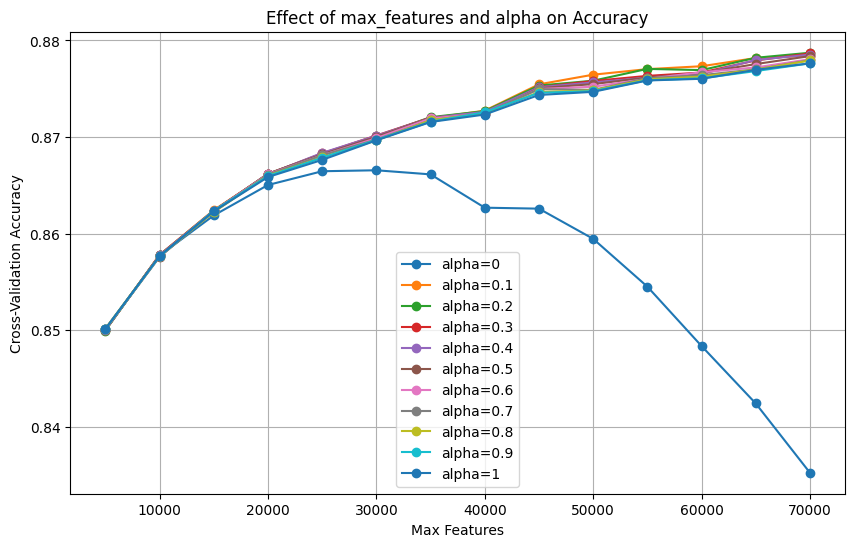

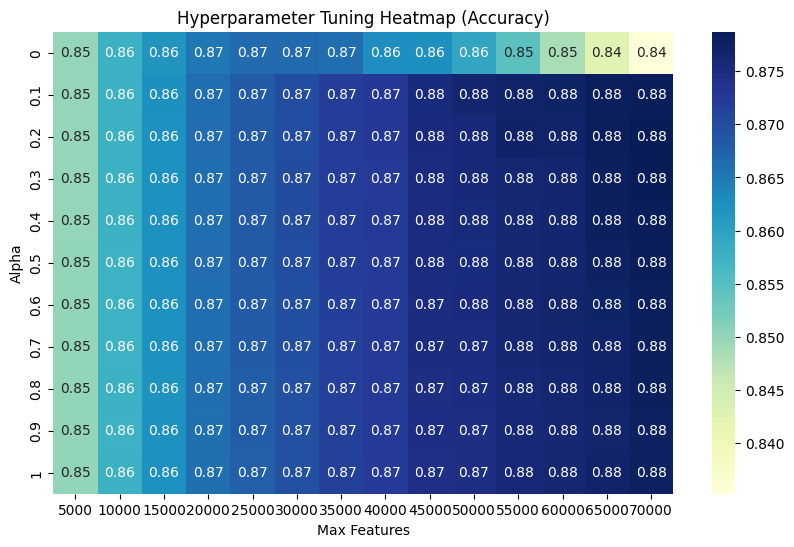

In [11]:
import numpy as np
import itertools
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Hyperparameter candidates
max_features_values = [5000, 10000, 15000, 20000, 25000, 30000, 35000, 40000, 45000, 50000, 55000, 60000, 65000, 70000]
alphas = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

# Store results
best_score = 0
best_params = None
results = []

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Hyperparameter tuning using cross-validation
for max_features, alpha in itertools.product(max_features_values, alphas):
    print(f"Testing max_features={max_features}, alpha={alpha}...")

    # Initialize CountVectorizer with current max_features
    vectorizer = CountVectorizer(max_features=max_features, ngram_range=(1,3))  

    # Fit and transform the training data
    X_train_BoW = vectorizer.fit_transform(X_train)

    # Define and evaluate the model
    nb_model = MultinomialNB(alpha=alpha)
    cv_scores = cross_val_score(nb_model, X_train_BoW, y_train, cv=cv, scoring='accuracy', n_jobs=-1)

    mean_cv_score = cv_scores.mean()

    # Store the results
    results.append((max_features, alpha, mean_cv_score))

    # Track the best hyperparameters
    if mean_cv_score > best_score:
        best_score = mean_cv_score
        best_params = (max_features, alpha)

# Convert results to a NumPy array for easy plotting
results_array = np.array(results)

# Best hyperparameters found
best_max_features, best_alpha = best_params
print(f"\nBest Hyperparameters: max_features={best_max_features}, alpha={best_alpha}")
print(f"Best Cross-Validation Accuracy: {best_score:.4f}")

### PLOTS ###

# Line Plot: max_features vs. Accuracy for each alpha
plt.figure(figsize=(10, 6))
for alpha in alphas:
    alpha_results = results_array[results_array[:, 1] == alpha]
    plt.plot(alpha_results[:, 0], alpha_results[:, 2], marker='o', label=f'alpha={alpha}')

plt.xlabel("Max Features")
plt.ylabel("Cross-Validation Accuracy")
plt.title("Effect of max_features and alpha on Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# Heatmap: Accuracy for each (max_features, alpha) combination
heatmap_data = np.zeros((len(alphas), len(max_features_values)))
for i, alpha in enumerate(alphas):
    for j, max_features in enumerate(max_features_values):
        score = results_array[(results_array[:, 0] == max_features) & (results_array[:, 1] == alpha), 2]
        heatmap_data[i, j] = score[0] if len(score) > 0 else np.nan

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, xticklabels=max_features_values, yticklabels=alphas, cmap="YlGnBu")
plt.xlabel("Max Features")
plt.ylabel("Alpha")
plt.title("Hyperparameter Tuning Heatmap (Accuracy)")
plt.show()

##### Test for Bag of Words

In [21]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Set chosen best hyperparameters
max_features = 45000
alpha = 0.1

# Initialize CountVectorizer (BoW Model)
vectorizer = CountVectorizer(max_features=max_features, ngram_range=(1,3))  

# Fit and transform the training data
X_train_BoW = vectorizer.fit_transform(X_train)

# Transform the test data using the same vocabulary
X_test_BoW = vectorizer.transform(X_test)

# Define the Naive Bayes model with the chosen alpha
nb_model = MultinomialNB(alpha=alpha)

# Train the model on the training data
nb_model.fit(X_train_BoW, y_train)

# Predict on the train and test set
y_train_pred = nb_model.predict(X_train_BoW)
y_test_pred = nb_model.predict(X_test_BoW)

# Compute Train and Test Accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print Train and Test Accuracy
print(f"Naïve Bayes Accuracy (alpha={alpha}, max_features={max_features}):")
print(f"  Train Accuracy: {train_accuracy:.4f}")
print(f"  Test Accuracy: {test_accuracy:.4f}")
print("-" * 50)  # Separator for clarity

# Print classification report
print("Classification Report (Test Set):")
print(classification_report(y_test, y_test_pred))

      
        


Naïve Bayes Accuracy (alpha=0.1, max_features=45000):
  Train Accuracy: 0.9032
  Test Accuracy: 0.8749
--------------------------------------------------
Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.87      0.88      0.87      5000
           1       0.87      0.87      0.87      5000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



### Naïve Bayes with TF-IDF

##### Hyperperimeter experimentation

Testing max_features=5000, alpha=0...


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/naive_bayes.py:898: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/naive_bayes.py:898: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(


Testing max_features=5000, alpha=0.1...
Testing max_features=5000, alpha=0.2...
Testing max_features=5000, alpha=0.3...
Testing max_features=5000, alpha=0.4...
Testing max_features=5000, alpha=0.5...
Testing max_features=5000, alpha=0.6...
Testing max_features=5000, alpha=0.7...
Testing max_features=5000, alpha=0.8...
Testing max_features=5000, alpha=0.9...
Testing max_features=5000, alpha=1...
Testing max_features=10000, alpha=0...


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/naive_bayes.py:898: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/naive_bayes.py:898: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/naive_bayes.py:898: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/naive_bayes.py:898: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/naive_bayes.py:898: RuntimeWarning: divide by zero e

Testing max_features=10000, alpha=0.1...
Testing max_features=10000, alpha=0.2...
Testing max_features=10000, alpha=0.3...
Testing max_features=10000, alpha=0.4...
Testing max_features=10000, alpha=0.5...
Testing max_features=10000, alpha=0.6...
Testing max_features=10000, alpha=0.7...
Testing max_features=10000, alpha=0.8...
Testing max_features=10000, alpha=0.9...
Testing max_features=10000, alpha=1...
Testing max_features=15000, alpha=0...


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/naive_bayes.py:898: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/naive_bayes.py:898: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/naive_bayes.py:898: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/naive_bayes.py:898: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/naive_bayes.py:898: RuntimeWarning: divide by zero e

Testing max_features=15000, alpha=0.1...
Testing max_features=15000, alpha=0.2...
Testing max_features=15000, alpha=0.3...
Testing max_features=15000, alpha=0.4...
Testing max_features=15000, alpha=0.5...
Testing max_features=15000, alpha=0.6...
Testing max_features=15000, alpha=0.7...
Testing max_features=15000, alpha=0.8...
Testing max_features=15000, alpha=0.9...
Testing max_features=15000, alpha=1...
Testing max_features=20000, alpha=0...


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/naive_bayes.py:898: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/naive_bayes.py:898: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/naive_bayes.py:898: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/naive_bayes.py:898: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/naive_bayes.py:898: RuntimeWarning: divide by zero e

Testing max_features=20000, alpha=0.1...
Testing max_features=20000, alpha=0.2...
Testing max_features=20000, alpha=0.3...
Testing max_features=20000, alpha=0.4...
Testing max_features=20000, alpha=0.5...
Testing max_features=20000, alpha=0.6...
Testing max_features=20000, alpha=0.7...
Testing max_features=20000, alpha=0.8...
Testing max_features=20000, alpha=0.9...
Testing max_features=20000, alpha=1...
Testing max_features=25000, alpha=0...


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/naive_bayes.py:898: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/naive_bayes.py:898: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/naive_bayes.py:898: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/naive_bayes.py:898: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/naive_bayes.py:898: RuntimeWarning: divide by zero e

Testing max_features=25000, alpha=0.1...
Testing max_features=25000, alpha=0.2...
Testing max_features=25000, alpha=0.3...
Testing max_features=25000, alpha=0.4...
Testing max_features=25000, alpha=0.5...
Testing max_features=25000, alpha=0.6...
Testing max_features=25000, alpha=0.7...
Testing max_features=25000, alpha=0.8...
Testing max_features=25000, alpha=0.9...
Testing max_features=25000, alpha=1...
Testing max_features=30000, alpha=0...


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/naive_bayes.py:898: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/naive_bayes.py:898: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/naive_bayes.py:898: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/naive_bayes.py:898: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/naive_bayes.py:898: RuntimeWarning: divide by zero e

Testing max_features=30000, alpha=0.1...
Testing max_features=30000, alpha=0.2...
Testing max_features=30000, alpha=0.3...
Testing max_features=30000, alpha=0.4...
Testing max_features=30000, alpha=0.5...
Testing max_features=30000, alpha=0.6...
Testing max_features=30000, alpha=0.7...
Testing max_features=30000, alpha=0.8...
Testing max_features=30000, alpha=0.9...
Testing max_features=30000, alpha=1...
Testing max_features=35000, alpha=0...


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/naive_bayes.py:898: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/naive_bayes.py:898: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/naive_bayes.py:898: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/naive_bayes.py:898: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/naive_bayes.py:898: RuntimeWarning: divide by zero e

Testing max_features=35000, alpha=0.1...
Testing max_features=35000, alpha=0.2...
Testing max_features=35000, alpha=0.3...
Testing max_features=35000, alpha=0.4...
Testing max_features=35000, alpha=0.5...
Testing max_features=35000, alpha=0.6...
Testing max_features=35000, alpha=0.7...
Testing max_features=35000, alpha=0.8...
Testing max_features=35000, alpha=0.9...
Testing max_features=35000, alpha=1...
Testing max_features=40000, alpha=0...


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/naive_bayes.py:898: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/naive_bayes.py:898: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/naive_bayes.py:898: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/naive_bayes.py:898: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/naive_bayes.py:898: RuntimeWarning: divide by zero e

Testing max_features=40000, alpha=0.1...
Testing max_features=40000, alpha=0.2...
Testing max_features=40000, alpha=0.3...
Testing max_features=40000, alpha=0.4...
Testing max_features=40000, alpha=0.5...
Testing max_features=40000, alpha=0.6...
Testing max_features=40000, alpha=0.7...
Testing max_features=40000, alpha=0.8...
Testing max_features=40000, alpha=0.9...
Testing max_features=40000, alpha=1...
Testing max_features=45000, alpha=0...


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/naive_bayes.py:898: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/naive_bayes.py:898: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/naive_bayes.py:898: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/naive_bayes.py:898: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/naive_bayes.py:898: RuntimeWarning: divide by zero e

Testing max_features=45000, alpha=0.1...
Testing max_features=45000, alpha=0.2...
Testing max_features=45000, alpha=0.3...
Testing max_features=45000, alpha=0.4...
Testing max_features=45000, alpha=0.5...
Testing max_features=45000, alpha=0.6...
Testing max_features=45000, alpha=0.7...
Testing max_features=45000, alpha=0.8...
Testing max_features=45000, alpha=0.9...
Testing max_features=45000, alpha=1...
Testing max_features=50000, alpha=0...


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/naive_bayes.py:898: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/naive_bayes.py:898: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/naive_bayes.py:898: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/naive_bayes.py:898: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/naive_bayes.py:898: RuntimeWarning: divide by zero e

Testing max_features=50000, alpha=0.1...
Testing max_features=50000, alpha=0.2...
Testing max_features=50000, alpha=0.3...
Testing max_features=50000, alpha=0.4...
Testing max_features=50000, alpha=0.5...
Testing max_features=50000, alpha=0.6...
Testing max_features=50000, alpha=0.7...
Testing max_features=50000, alpha=0.8...
Testing max_features=50000, alpha=0.9...
Testing max_features=50000, alpha=1...
Testing max_features=55000, alpha=0...


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/naive_bayes.py:898: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/naive_bayes.py:898: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/naive_bayes.py:898: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/naive_bayes.py:898: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/naive_bayes.py:898: RuntimeWarning: divide by zero e

Testing max_features=55000, alpha=0.1...
Testing max_features=55000, alpha=0.2...
Testing max_features=55000, alpha=0.3...
Testing max_features=55000, alpha=0.4...
Testing max_features=55000, alpha=0.5...
Testing max_features=55000, alpha=0.6...
Testing max_features=55000, alpha=0.7...
Testing max_features=55000, alpha=0.8...
Testing max_features=55000, alpha=0.9...
Testing max_features=55000, alpha=1...
Testing max_features=60000, alpha=0...


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/naive_bayes.py:898: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/naive_bayes.py:898: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/naive_bayes.py:898: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/naive_bayes.py:898: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/naive_bayes.py:898: RuntimeWarning: divide by zero e

Testing max_features=60000, alpha=0.1...
Testing max_features=60000, alpha=0.2...
Testing max_features=60000, alpha=0.3...
Testing max_features=60000, alpha=0.4...
Testing max_features=60000, alpha=0.5...
Testing max_features=60000, alpha=0.6...
Testing max_features=60000, alpha=0.7...
Testing max_features=60000, alpha=0.8...
Testing max_features=60000, alpha=0.9...
Testing max_features=60000, alpha=1...
Testing max_features=65000, alpha=0...


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/naive_bayes.py:898: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/naive_bayes.py:898: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/naive_bayes.py:898: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/naive_bayes.py:898: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/naive_bayes.py:898: RuntimeWarning: divide by zero e

Testing max_features=65000, alpha=0.1...
Testing max_features=65000, alpha=0.2...
Testing max_features=65000, alpha=0.3...
Testing max_features=65000, alpha=0.4...
Testing max_features=65000, alpha=0.5...
Testing max_features=65000, alpha=0.6...
Testing max_features=65000, alpha=0.7...
Testing max_features=65000, alpha=0.8...
Testing max_features=65000, alpha=0.9...
Testing max_features=65000, alpha=1...
Testing max_features=70000, alpha=0...


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/naive_bayes.py:898: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/naive_bayes.py:898: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/naive_bayes.py:898: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/naive_bayes.py:898: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/naive_bayes.py:898: RuntimeWarning: divide by zero e

Testing max_features=70000, alpha=0.1...
Testing max_features=70000, alpha=0.2...
Testing max_features=70000, alpha=0.3...
Testing max_features=70000, alpha=0.4...
Testing max_features=70000, alpha=0.5...
Testing max_features=70000, alpha=0.6...
Testing max_features=70000, alpha=0.7...
Testing max_features=70000, alpha=0.8...
Testing max_features=70000, alpha=0.9...
Testing max_features=70000, alpha=1...

Best Hyperparameters: max_features=70000, alpha=0.3
Best Cross-Validation Accuracy: 0.8872


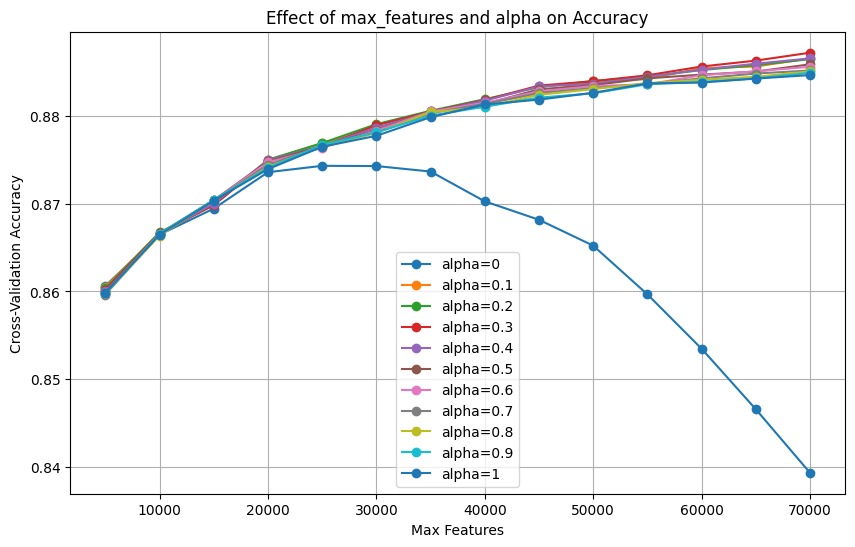

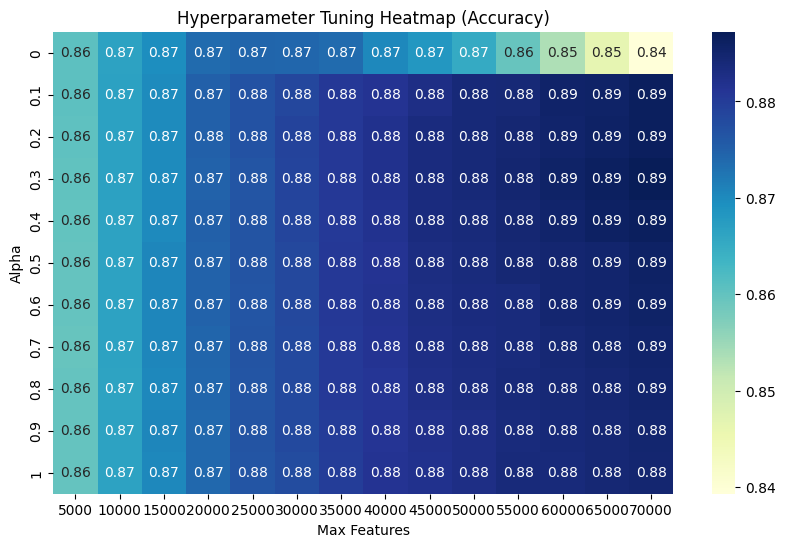

In [13]:
import numpy as np
import itertools
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Hyperparameter candidates
max_features_values = [5000, 10000, 15000, 20000, 25000, 30000, 35000, 40000, 45000, 50000, 55000, 60000, 65000, 70000]
alphas = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

# Store results
best_score = 0
best_params = None
results = []

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Hyperparameter tuning using cross-validation
for max_features, alpha in itertools.product(max_features_values, alphas):
    print(f"Testing max_features={max_features}, alpha={alpha}...")

    # Initialize TfidfVectorizer with current max_features
    vectorizer = TfidfVectorizer(max_features=max_features, ngram_range=(1,3))  

    # Fit and transform the training data
    X_train_tfidf = vectorizer.fit_transform(X_train)

    # Define and evaluate the model
    nb_model = MultinomialNB(alpha=alpha)
    cv_scores = cross_val_score(nb_model, X_train_tfidf, y_train, cv=cv, scoring='accuracy', n_jobs=-1)

    mean_cv_score = cv_scores.mean()

    # Store the results
    results.append((max_features, alpha, mean_cv_score))

    # Track the best hyperparameters
    if mean_cv_score > best_score:
        best_score = mean_cv_score
        best_params = (max_features, alpha)

# Convert results to a NumPy array for easy plotting
results_array = np.array(results)

# Best hyperparameters found
best_max_features, best_alpha = best_params
print(f"\nBest Hyperparameters: max_features={best_max_features}, alpha={best_alpha}")
print(f"Best Cross-Validation Accuracy: {best_score:.4f}")

### PLOTS ###

# Line Plot: max_features vs. Accuracy for each alpha
plt.figure(figsize=(10, 6))
for alpha in alphas:
    alpha_results = results_array[results_array[:, 1] == alpha]
    plt.plot(alpha_results[:, 0], alpha_results[:, 2], marker='o', label=f'alpha={alpha}')

plt.xlabel("Max Features")
plt.ylabel("Cross-Validation Accuracy")
plt.title("Effect of max_features and alpha on Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# Heatmap: Accuracy for each (max_features, alpha) combination
heatmap_data = np.zeros((len(alphas), len(max_features_values)))
for i, alpha in enumerate(alphas):
    for j, max_features in enumerate(max_features_values):
        score = results_array[(results_array[:, 0] == max_features) & (results_array[:, 1] == alpha), 2]
        heatmap_data[i, j] = score[0] if len(score) > 0 else np.nan

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, xticklabels=max_features_values, yticklabels=alphas, cmap="YlGnBu")
plt.xlabel("Max Features")
plt.ylabel("Alpha")
plt.title("Hyperparameter Tuning Heatmap (Accuracy)")
plt.show()

##### Test for TF-IDF

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Set chosen best hyperparameters
max_features = 60000
alpha = 0.2

# Initialize CountVectorizer (BoW Model)
vectorizer = CountVectorizer(max_features=max_features, ngram_range=(1,3))  

# Fit and transform the training data
X_train_tfidf = vectorizer.fit_transform(X_train)

# Transform the test data using the same vocabulary
X_test_tfidf = vectorizer.transform(X_test)

# Define the Naive Bayes model with the chosen alpha
nb_model = MultinomialNB(alpha=alpha)

# Train the model on the training data
nb_model.fit(X_train_tfidf, y_train)

# Predict on the train and test set
y_train_pred = nb_model.predict(X_train_tfidf)
y_test_pred = nb_model.predict(X_test_tfidf)

# Compute Train and Test Accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print Train and Test Accuracy
print(f"Naïve Bayes Accuracy (alpha={alpha}, max_features={max_features}):")
print(f"  Train Accuracy: {train_accuracy:.4f}")
print(f"  Test Accuracy: {test_accuracy:.4f}")
print("-" * 50)  # Separator for clarity

# Print classification report
print("Classification Report (Test Set):")
print(classification_report(y_test, y_test_pred))

Naïve Bayes Accuracy (alpha=0.2, max_features=60000):
  Train Accuracy: 0.9102
  Test Accuracy: 0.8766
--------------------------------------------------
Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.88      0.88      0.88      5000
           1       0.88      0.88      0.88      5000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000

